In [1]:
!pip install torch torchvision efficientnet_pytorch torchsummary scikit-learn matplotlib seaborn captum tqdm

🚀 Device: cuda
Scanning dataset directories...

   DATASET STATISTICS
Total Images: 1000
  - Adenocarcinoma: 338
  - Large Cell Carcinoma: 187
  - Normal: 215
  - Squamous Cell Carcinoma: 260

--- Generating 5x5 Sample Visualization ---


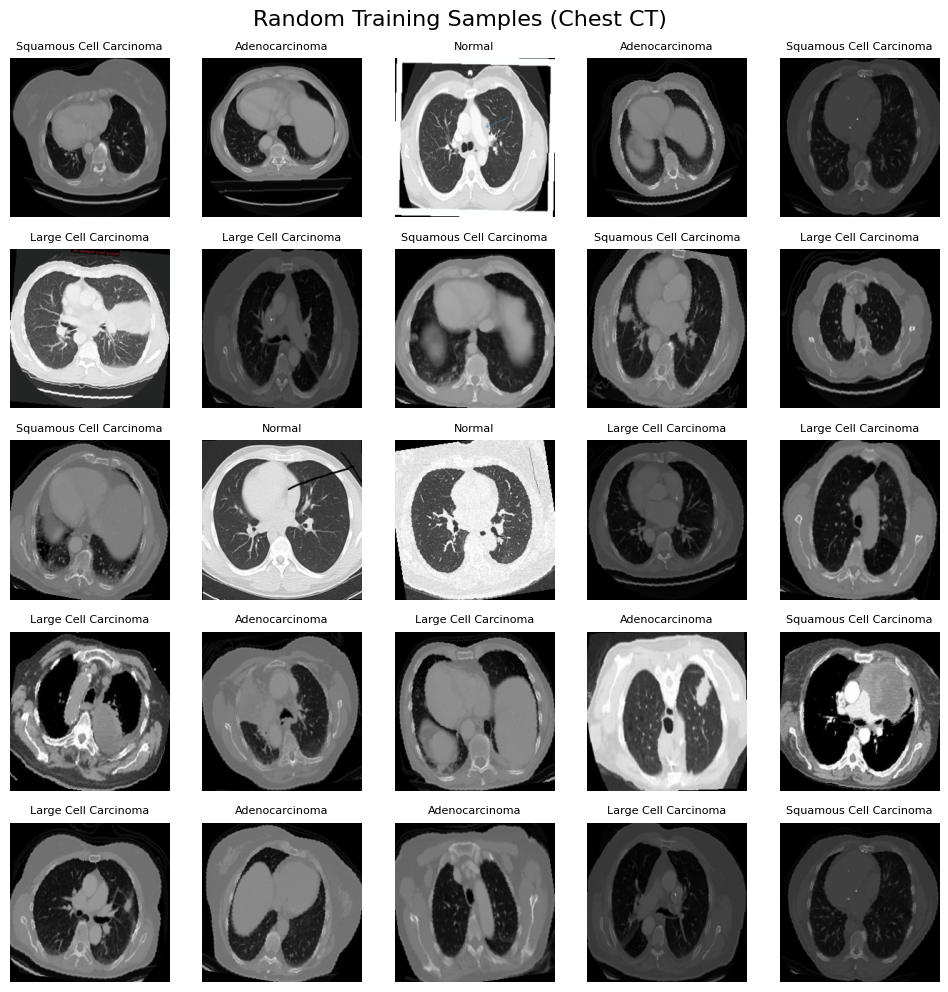


 STARTING TRAINING (MD-KAN Net)


Ep 1/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1: Train Loss=1.2628 Acc=0.4925 | Val Loss=0.8661 Acc=0.6450


Ep 2/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2: Train Loss=0.6461 Acc=0.7325 | Val Loss=0.7509 Acc=0.7000


Ep 3/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3: Train Loss=0.4383 Acc=0.8450 | Val Loss=0.3606 Acc=0.8700


Ep 4/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4: Train Loss=0.3101 Acc=0.8950 | Val Loss=0.2537 Acc=0.9050


Ep 5/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 5: Train Loss=0.2522 Acc=0.9200 | Val Loss=0.2204 Acc=0.9350


Ep 6/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 6: Train Loss=0.2128 Acc=0.9313 | Val Loss=0.1766 Acc=0.9500


Ep 7/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 7: Train Loss=0.1346 Acc=0.9537 | Val Loss=0.1570 Acc=0.9500


Ep 8/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 8: Train Loss=0.1194 Acc=0.9650 | Val Loss=0.1567 Acc=0.9550


Ep 9/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 9: Train Loss=0.0867 Acc=0.9800 | Val Loss=0.1393 Acc=0.9550


Ep 10/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 10: Train Loss=0.0880 Acc=0.9688 | Val Loss=0.1274 Acc=0.9600


Ep 11/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 11: Train Loss=0.0577 Acc=0.9875 | Val Loss=0.1037 Acc=0.9700


Ep 12/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 12: Train Loss=0.0505 Acc=0.9912 | Val Loss=0.0868 Acc=0.9650


Ep 13/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 13: Train Loss=0.0511 Acc=0.9838 | Val Loss=0.0983 Acc=0.9700


Ep 14/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 14: Train Loss=0.0370 Acc=0.9900 | Val Loss=0.1450 Acc=0.9700


Ep 15/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 15: Train Loss=0.0569 Acc=0.9800 | Val Loss=0.1221 Acc=0.9550


Ep 16/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 16: Train Loss=0.0478 Acc=0.9850 | Val Loss=0.1370 Acc=0.9700


Ep 17/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 17: Train Loss=0.0428 Acc=0.9850 | Val Loss=0.1261 Acc=0.9600


Ep 18/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 18: Train Loss=0.0431 Acc=0.9888 | Val Loss=0.1605 Acc=0.9650


Ep 19/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 19: Train Loss=0.0442 Acc=0.9825 | Val Loss=0.1548 Acc=0.9600


Ep 20/20:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 20: Train Loss=0.0256 Acc=0.9938 | Val Loss=0.1300 Acc=0.9500

✅ Training Complete. Best Val Acc: 0.9700
💾 Weights saved: 'ChestCT_Best.pth', 'ChestCT_Final.pth'


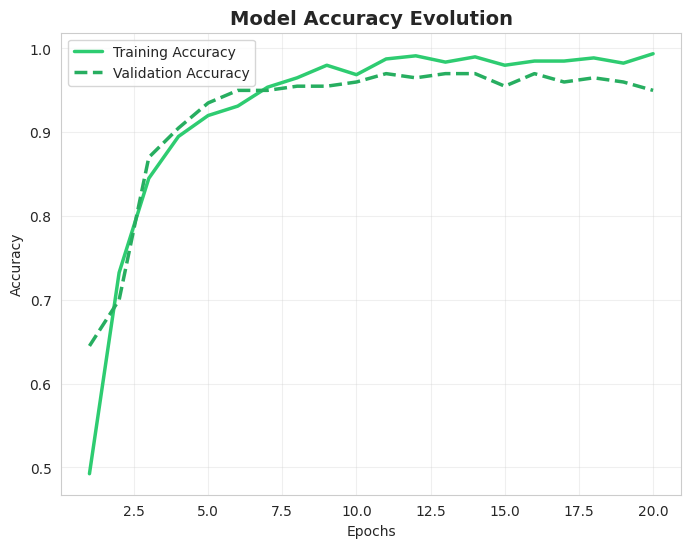

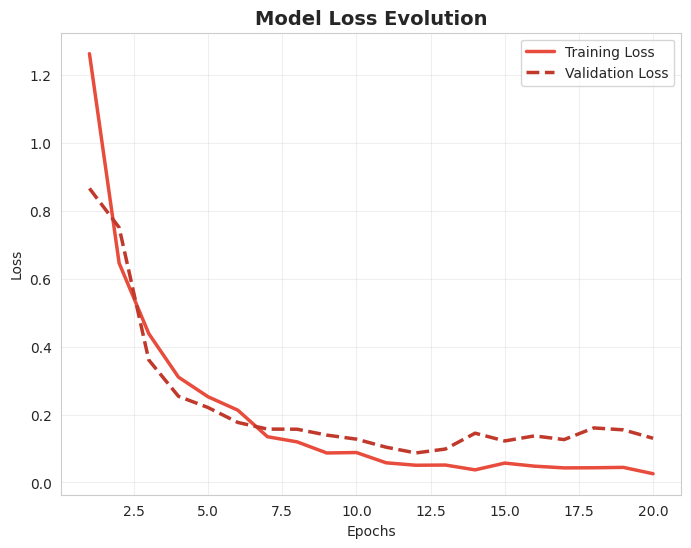

Evaluating Metrics:   0%|          | 0/7 [00:00<?, ?it/s]

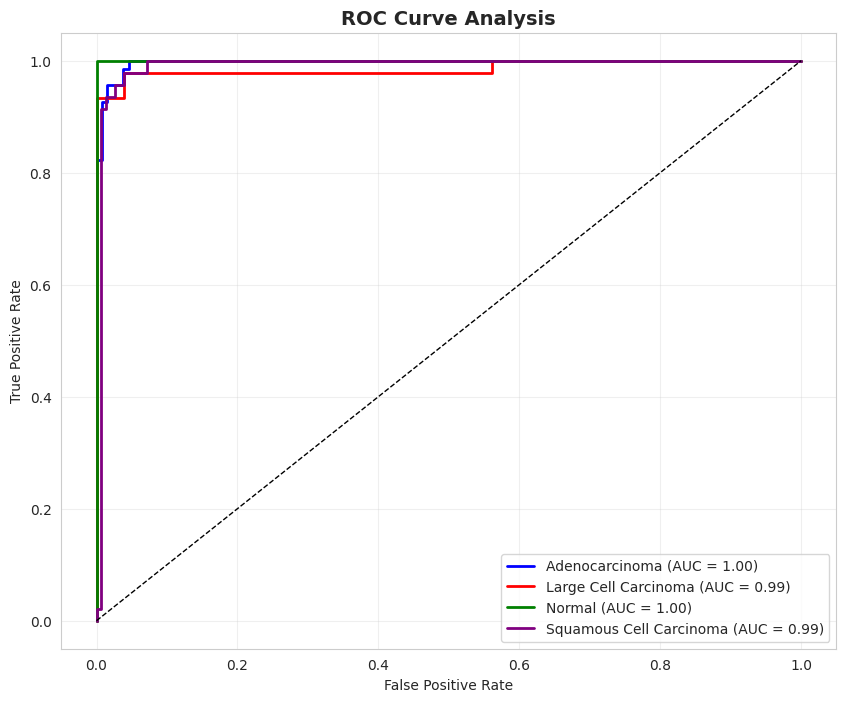

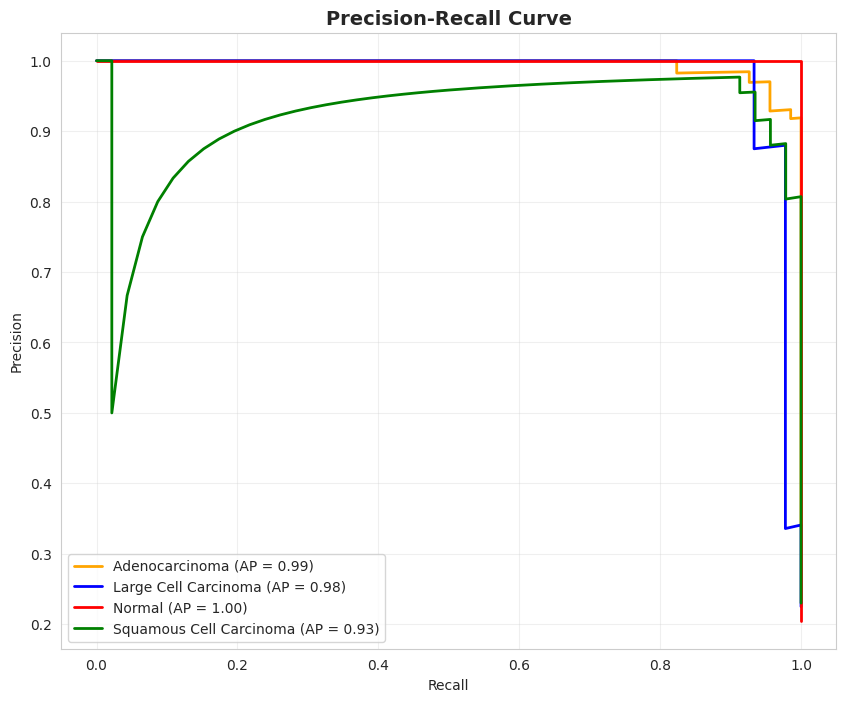

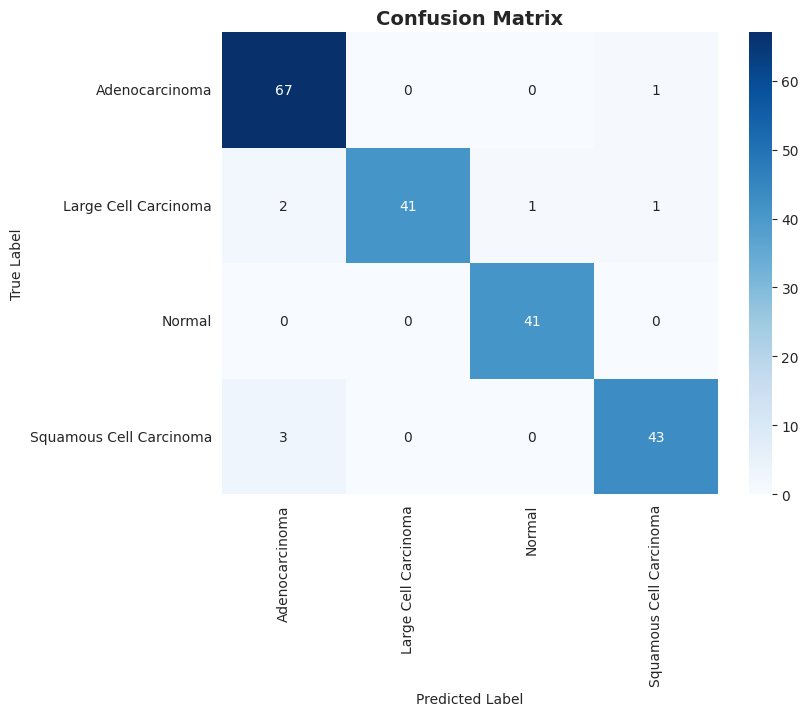

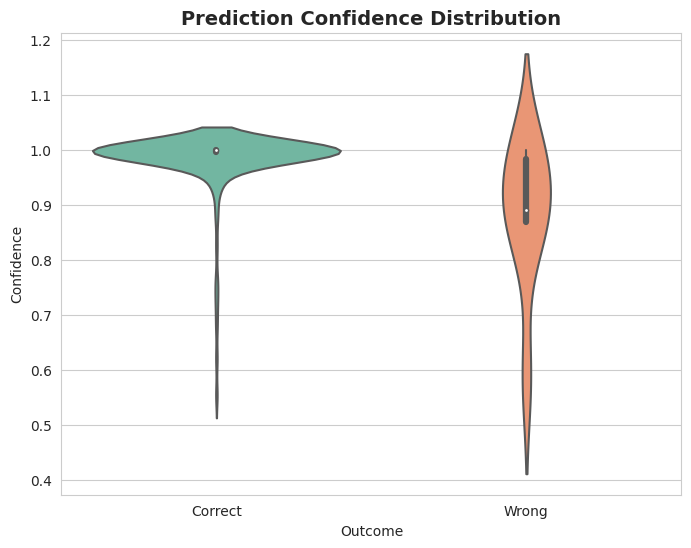

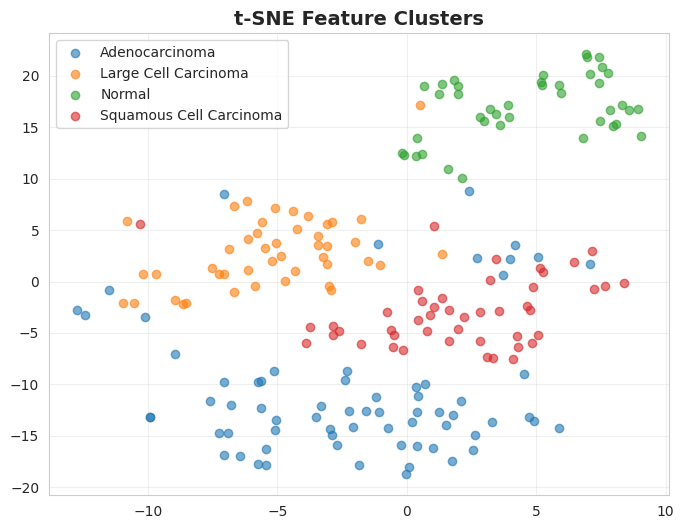


--- Generating Advanced XAI Grid (12 Images) ---


/usr/local/lib/python3.11/dist-packages/captum/attr/_core/lime.py:1141: UserWarning: Attempting to construct interpretable model with > 10000 features.This can be very slow or lead to OOM issues. Please provide a featuremask which groups input features to reduce the number of interpretablefeatures. 
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.155e+03, tolerance: 4.178e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/captum/attr/_core/lime.py:1141: UserWarning: Attempting to construct interpretable model with > 10000 features.This can be very slow or lead to OOM issues. Please provide a featuremask which groups input features to reduce the number of interpretablefeatures. 
  warnings.warn(
/usr/local/lib/

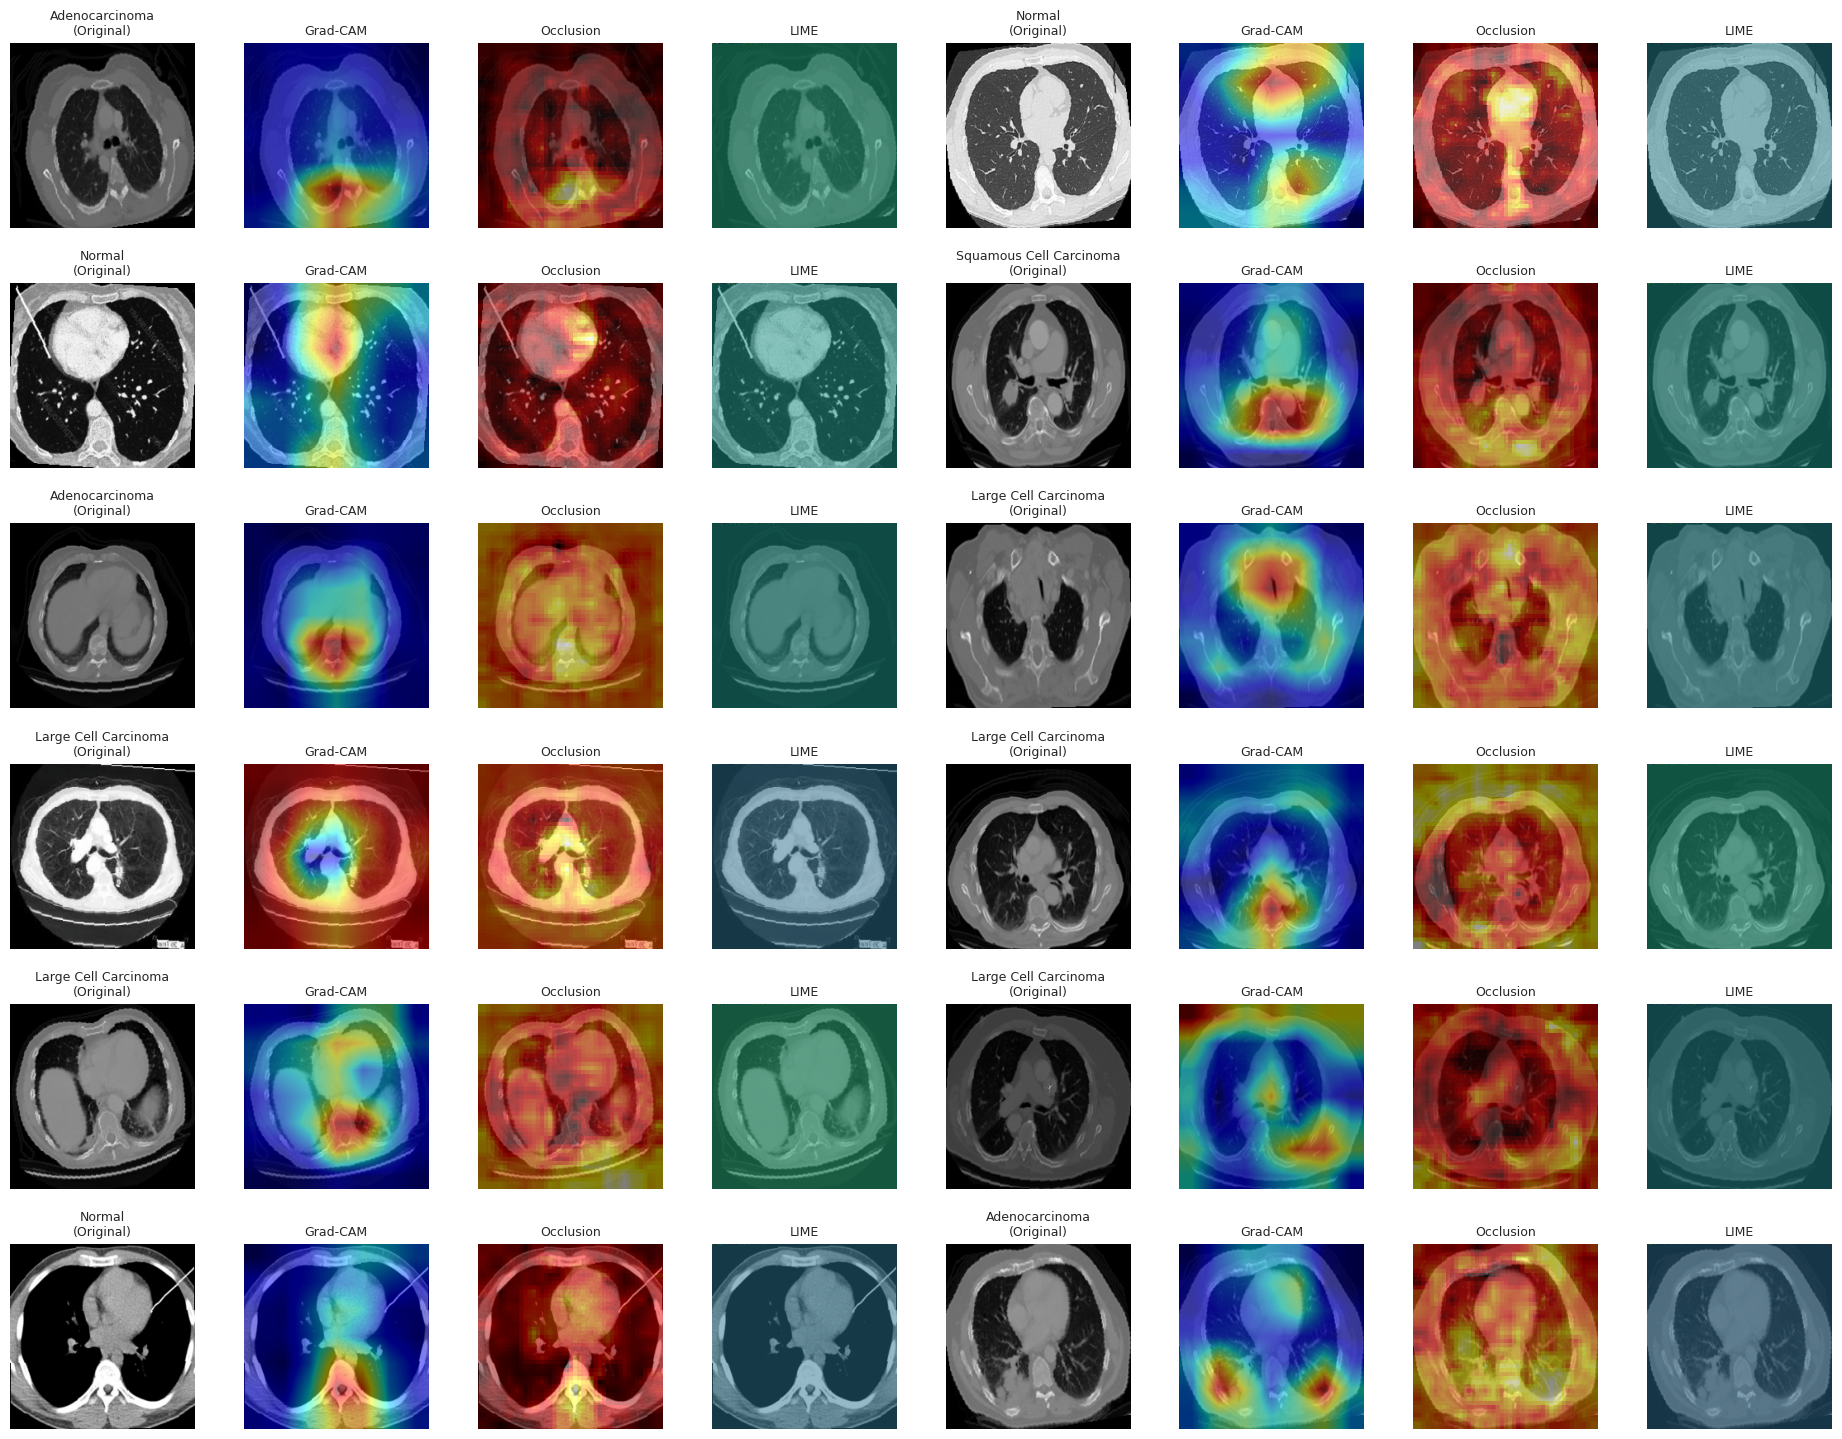

In [2]:
import os
import glob
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.notebook import tqdm
from itertools import cycle

# Metrics & Sklearn
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, 
                             roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
from sklearn.calibration import calibration_curve

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms, models

# XAI
from captum.attr import LayerGradCam, Occlusion, Lime
from captum.attr import visualization as viz

# ==================================================================================
# 1. CONFIGURATION
# ==================================================================================
CONFIG = {
    'ROOT_DIR': '/kaggle/input/chest-ctscan-images/Data',
    'IMG_SIZE': 224,
    'BATCH_SIZE': 32,
    'EPOCHS': 20,
    'LEARNING_RATE': 1e-4,
    'DEVICE': torch.device("cuda" if torch.cuda.is_available() else "cpu")
}

print(f"🚀 Device: {CONFIG['DEVICE']}")

# ==================================================================================
# 2. DATA LOADING, COUNTING & VISUALIZATION
# ==================================================================================
class ChestCTDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
        
        print("Scanning dataset directories...")
        # Recursively find images and map folder names to classes
        for filepath in glob.glob(os.path.join(root_dir, '**/*'), recursive=True):
            if filepath.lower().endswith(('.png', '.jpg', '.jpeg')):
                parent = os.path.basename(os.path.dirname(filepath)).lower()
                label = -1
                if 'adenocarcinoma' in parent: label = 0
                elif 'large.cell.carcinoma' in parent: label = 1
                elif 'normal' in parent: label = 2
                elif 'squamous.cell.carcinoma' in parent: label = 3
                
                if label != -1:
                    self.image_paths.append(filepath)
                    self.labels.append(label)

    def __len__(self): return len(self.image_paths)
    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform: img = self.transform(img)
        return img, label

def setup_and_visualize():
    # 1. Define Transforms
    tfm = transforms.Compose([
        transforms.Resize((CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE'])),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # 2. Load Dataset
    dataset = ChestCTDataset(CONFIG['ROOT_DIR'], transform=tfm)
    
    # 3. Print Statistics
    counts = pd.Series(dataset.labels).value_counts().sort_index()
    print("\n" + "="*40)
    print("   DATASET STATISTICS")
    print("="*40)
    print(f"Total Images: {len(dataset)}")
    for i, count in enumerate(counts):
        print(f"  - {dataset.class_names[i]}: {count}")
    print("="*40 + "\n")
    
    # 4. Visualize 5x5 Grid
    print("--- Generating 5x5 Sample Visualization ---")
    indices = np.random.choice(len(dataset), 25, replace=False)
    plt.figure(figsize=(12, 12))
    plt.suptitle("Random Training Samples (Chest CT)", fontsize=16, y=0.92)
    
    for i, idx in enumerate(indices):
        img, lbl = dataset[idx]
        plt.subplot(5, 5, i+1)
        # Un-normalize for display
        img = img.permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        plt.imshow(np.clip(img, 0, 1))
        plt.title(dataset.class_names[lbl], fontsize=8)
        plt.axis('off')
    plt.show()
    
    # 5. Split & Loaders
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_s, val_s = random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_s, batch_size=CONFIG['BATCH_SIZE'], shuffle=True, num_workers=2)
    val_loader = DataLoader(val_s, batch_size=CONFIG['BATCH_SIZE'], shuffle=False, num_workers=2)
    
    return train_loader, val_loader, dataset.class_names

# EXECUTE DATA PHASE
train_loader, val_loader, class_names = setup_and_visualize()

# ==================================================================================
# 3. MODEL ARCHITECTURE (MD-KAN Net)
# ==================================================================================
class CoordinateAttention(nn.Module):
    def __init__(self, inp, oup, reduction=32):
        super().__init__()
        self.pool_h = nn.AdaptiveAvgPool2d((None, 1)); self.pool_w = nn.AdaptiveAvgPool2d((1, None))
        mip = max(8, inp // reduction)
        self.conv1 = nn.Conv2d(inp, mip, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(mip); self.act = nn.Hardswish()
        self.conv_h = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
        self.conv_w = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
    def forward(self, x):
        identity = x; n,c,h,w = x.size()
        x_h = self.pool_h(x); x_w = self.pool_w(x).permute(0, 1, 3, 2)
        y = torch.cat([x_h, x_w], dim=2)
        y = self.act(self.bn1(self.conv1(y)))
        x_h, x_w = torch.split(y, [h, w], dim=2)
        x_w = x_w.permute(0, 1, 3, 2)
        a_h = torch.sigmoid(self.conv_h(x_h)); a_w = torch.sigmoid(self.conv_w(x_w))
        return identity * a_w * a_h

class SimAM(nn.Module):
    def __init__(self, e_lambda=1e-4):
        super().__init__(); self.activaton = nn.Sigmoid(); self.e_lambda = e_lambda
    def forward(self, x):
        b, c, h, w = x.size(); n = w * h - 1
        x_minus_mu_square = (x - x.mean(dim=[2,3], keepdim=True)).pow(2)
        y = x_minus_mu_square / (4 * (x_minus_mu_square.sum(dim=[2,3], keepdim=True) / n + self.e_lambda)) + 0.5
        return x * self.activaton(y)

class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5):
        super().__init__()
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size))
        nn.init.kaiming_uniform_(self.base_weight, a=5**0.5); nn.init.normal_(self.spline_weight, 0.0, 1.0)
    def forward(self, x):
        base = torch.nn.functional.linear(x, self.base_weight)
        spline = torch.sum(self.spline_weight.mean(dim=2) * x.unsqueeze(1), dim=2)
        return base + spline

class MD_KAN_Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.backbone = models.efficientnet_b0(weights='IMAGENET1K_V1')
        self.features = self.backbone.features
        self.coord = CoordinateAttention(1280, 1280)
        self.simam = SimAM()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.drop = nn.Dropout(0.3)
        self.kan = KANLinear(1280, num_classes)
    def forward(self, x):
        x = self.features(x); x = self.coord(x); x = self.simam(x)
        x = self.pool(x).flatten(1); x = self.drop(x)
        return self.kan(x)

model = MD_KAN_Net(len(class_names)).to(CONFIG['DEVICE'])

# ==================================================================================
# 4. TRAINING ENGINE (Detailed Printing)
# ==================================================================================
def train_engine(model, train_loader, val_loader, epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['LEARNING_RATE'])
    
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_acc = 0.0
    
    print(f"\n{'='*40}\n STARTING TRAINING (MD-KAN Net)\n{'='*40}")
    
    for epoch in range(epochs):
        # --- TRAIN ---
        model.train()
        r_loss, r_corr, total = 0, 0, 0
        for x, y in tqdm(train_loader, desc=f"Ep {epoch+1}/{epochs}", leave=False):
            x, y = x.to(CONFIG['DEVICE']), y.to(CONFIG['DEVICE'])
            optimizer.zero_grad(); out = model(x); loss = criterion(out, y)
            loss.backward(); optimizer.step()
            r_loss += loss.item()*x.size(0); r_corr += (out.argmax(1)==y).sum().item(); total += y.size(0)
            
        t_loss = r_loss / total
        t_acc = r_corr / total
        
        # --- VALIDATE ---
        model.eval()
        v_loss, v_corr, v_total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(CONFIG['DEVICE']), y.to(CONFIG['DEVICE'])
                out = model(x); loss = criterion(out, y)
                v_loss += loss.item()*x.size(0); v_corr += (out.argmax(1)==y).sum().item(); v_total += y.size(0)
        
        v_loss = v_loss / v_total
        v_acc = v_corr / v_total
        
        history['train_loss'].append(t_loss); history['train_acc'].append(t_acc)
        history['val_loss'].append(v_loss); history['val_acc'].append(v_acc)
        
        # EXPLICIT PRINTING
        print(f"Epoch {epoch+1}: Train Loss={t_loss:.4f} Acc={t_acc:.4f} | Val Loss={v_loss:.4f} Acc={v_acc:.4f}")
        
        if v_acc > best_acc:
            best_acc = v_acc
            torch.save(model.state_dict(), "ChestCT_Best.pth")
            
    torch.save(model.state_dict(), "ChestCT_Final.pth")
    print(f"\n✅ Training Complete. Best Val Acc: {best_acc:.4f}")
    print("💾 Weights saved: 'ChestCT_Best.pth', 'ChestCT_Final.pth'")
    return history

history = train_engine(model, train_loader, val_loader, CONFIG['EPOCHS'])

# ==================================================================================
# 5. SEPARATE PLOTS (FOR COPY-PASTE)
# ==================================================================================
sns.set_style("whitegrid")
epochs_r = range(1, len(history['train_loss']) + 1)

def save_show(title):
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

# 1. Accuracy Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs_r, history['train_acc'], label='Training Accuracy', color='#2ecc71', linewidth=2.5)
plt.plot(epochs_r, history['val_acc'], label='Validation Accuracy', color='#27ae60', linestyle='--', linewidth=2.5)
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
save_show("Model Accuracy Evolution")

# 2. Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs_r, history['train_loss'], label='Training Loss', color='#e74c3c', linewidth=2.5)
plt.plot(epochs_r, history['val_loss'], label='Validation Loss', color='#c0392b', linestyle='--', linewidth=2.5)
plt.xlabel("Epochs"); plt.ylabel("Loss")
save_show("Model Loss Evolution")

# --- INFERENCE FOR DETAILED PLOTS ---
model.eval()
y_true, y_prob, y_pred, feats = [], [], [], []
with torch.no_grad():
    for x, y in tqdm(val_loader, desc="Evaluating Metrics"):
        x = x.to(CONFIG['DEVICE'])
        ft = model.features(x); ft = model.coord(ft); ft = model.simam(ft); ft = model.pool(ft).flatten(1)
        feats.extend(ft.cpu().numpy())
        out = model.kan(model.drop(ft)); prob = torch.softmax(out, 1)
        y_true.extend(y.numpy()); y_prob.extend(prob.cpu().numpy()); y_pred.extend(out.argmax(1).cpu().numpy())

y_bin = label_binarize(y_true, classes=range(len(class_names)))
y_prob = np.array(y_prob); y_true = np.array(y_true); feats = np.array(feats)
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

# 3. ROC Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{class_names[i]} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
save_show("ROC Curve Analysis")

# 4. Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(len(class_names)), colors):
    p, r, _ = precision_recall_curve(y_bin[:, i], y_prob[:, i])
    plt.plot(r, p, color=color, lw=2, label=f'{class_names[i]} (AP = {average_precision_score(y_bin[:, i], y_prob[:, i]):.2f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
save_show("Precision-Recall Curve")

# 5. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold'); plt.show()

# 6. Confidence Distribution
max_probs = np.max(y_prob, axis=1)
outcomes = ["Correct" if t==p else "Wrong" for t, p in zip(y_true, y_pred)]
df_conf = pd.DataFrame({'Confidence': max_probs, 'Outcome': outcomes})
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_conf, x='Outcome', y='Confidence', palette='Set2')
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold'); plt.show()

# 7. t-SNE Embedding
tsne = TSNE(n_components=2, random_state=42).fit_transform(feats[:1000])
plt.figure(figsize=(8, 6))
for i, cls in enumerate(class_names):
    mask = y_true[:1000] == i
    plt.scatter(tsne[mask, 0], tsne[mask, 1], label=cls, alpha=0.6)
save_show('t-SNE Feature Clusters')

# ==================================================================================
# 6. ADVANCED XAI (Original | Grad-CAM | Occlusion | LIME)
# ==================================================================================
print("\n--- Generating Advanced XAI Grid (12 Images) ---")
inputs, labels = next(iter(val_loader))
inputs = inputs[:12].to(CONFIG['DEVICE']); labels = labels[:12] # 12 Images total

grad_cam = LayerGradCam(model, model.features[-1])
occlusion = Occlusion(model)
lime = Lime(model)

fig, axes = plt.subplots(6, 8, figsize=(24, 18))
plt.subplots_adjust(wspace=0.05, hspace=0.3)

for row in range(6):
    indices = [row*2, row*2+1]
    for i, idx in enumerate(indices):
        col_base = i * 4
        img_t = inputs[idx].unsqueeze(0); lbl = labels[idx].item()
        
        # Compute XAI
        attr_gc = torch.nn.functional.interpolate(grad_cam.attribute(img_t, target=lbl), (224,224), mode='bilinear').squeeze().cpu().detach().numpy()
        attr_occ = np.sum(np.transpose(occlusion.attribute(img_t, target=lbl, sliding_window_shapes=(3,15,15), strides=(3,10,10)).squeeze().cpu().detach().numpy(), (1,2,0)), axis=2)
        attr_lime = np.sum(np.transpose(lime.attribute(img_t, target=lbl, n_samples=50).squeeze().cpu().detach().numpy(), (1,2,0)), axis=2)
        
        img_d = np.clip(inputs[idx].cpu().detach().permute(1,2,0).numpy() * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406]), 0, 1)
        
        # Plotting with Legends
        axes[row, col_base].imshow(img_d); axes[row, col_base].set_title(f"{class_names[lbl]}\n(Original)", fontsize=9); axes[row, col_base].axis('off')
        axes[row, col_base+1].imshow(img_d); axes[row, col_base+1].imshow(attr_gc, cmap='jet', alpha=0.5); axes[row, col_base+1].set_title("Grad-CAM", fontsize=9); axes[row, col_base+1].axis('off')
        axes[row, col_base+2].imshow(img_d); axes[row, col_base+2].imshow(attr_occ, cmap='hot', alpha=0.5); axes[row, col_base+2].set_title("Occlusion", fontsize=9); axes[row, col_base+2].axis('off')
        axes[row, col_base+3].imshow(img_d); axes[row, col_base+3].imshow(attr_lime, cmap='viridis', alpha=0.5); axes[row, col_base+3].set_title("LIME", fontsize=9); axes[row, col_base+3].axis('off')

plt.show()